<img src='../frameworks/img/EU-Copernicus-EUM-WEKEO_banner_logo.png' align='right' width='75%'></img>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_3_OLCI_coverage.ipynb"><< OLCI coverage</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_5_OLCI_plot_spectral_radiances_reflectances.ipynb">OLCI spectral plotting >></a>

Copernicus Marine Training Service <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://trainhub.eumetsat.int/ocean/sensors/1_4_OLCI_plot_spatial_RGB.ipynb"><img src="https://img.shields.io/badge/Launch-TrainHub-Blue.svg" alt="Open in TrainHub"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://mybinder.org/v2/gl/eumetlab%2Focean%2Fsensors%2Flearn-olci/main?labpath=1_OLCI_introductory/1_4_OLCI_plot_spatial_RGB.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://colab.research.google.com/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_4_OLCI_plot_spatial_RGB.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://studiolab.sagemaker.aws/import/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_4_OLCI_plot_spatial_RGB.ipynb"><img src="https://studiolab.sagemaker.aws/studiolab.svg" alt="Open In Studio Lab"/></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://pccompute.westeurope.cloudapp.azure.com/compute/hub/user-redirect/git-pull?repo=https://github.com/eumetlab/ocean/sensors/learn-olci&urlpath=1_OLCI_introductory/1_4_OLCI_plot_spatial_RGB.ipynb&branch=main"><img src="https://img.shields.io/badge/Open-Planetary%20Computer-black?style=flat&logo=microsoft" alt="Open in Planetary Computer"/></a></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h1>Learn OLCI: Introductory</h1></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **[1_1_OLCI_data_access.ipynb](1_1_OLCI_data_access.ipynb)** (this will download the required OLCI products for this notebook)

</div>
<hr>

<div class="alert alert-info" role="alert">

## OLCI spatial plotting (RGB)
    
</div>

### Data used

| Product Description  | Data Store collection ID|  WEkEO HDA ID | Product Navigator |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|
| Sentinel-3 OLCI level-1B Full resolution | EO:EUM:DAT:0409 | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | [link](https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%201%20Data&s=advanced) |

### Learning outcomes

At the end of this notebook you will know;
* Objective


### Outline

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Reading radiance/reflectance data](#section1)
 1. [Common RGB band recipes](#section2)
 1. [Improving RGBs](#section3)
 1. [Mapping RGBs](#section4)
 1. [Applying your knowledge](#section5)

<hr>

In [20]:
# library imports
import xarray as xr
import glob
import os
from IPython.display import display, Markdown, Image
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import numpy as np
import inspect
import warnings
warnings.filterwarnings('ignore')

import eumartools

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Reading radiance/reflectance data
[Back to top](#TOC_TOP)

</div>

# Diagram of OLCI bands vs spectrum

OLCI has 21 narrow spectral bands that detect at various wavelengths between 400 nm and 1020 nm. A subset of these wavelengths is shown in the image below

<img src='../img/S3_spectral_1200.png' align='centre' width='75%'></img>
<center>Figure: The spectral resolution of Sentinel-3 OLCI.</center>
<br>


In [2]:
# selecting SAFE directory
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3')

SAFE_directory = '/Users/benloveday/Documents/Test_products/OLCI/Blooms/Coccos_072021/S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3'


In [3]:
grid_reduce = 3

In [4]:
band_files = sorted(glob.glob(os.path.join(SAFE_directory,'Oa*.nc')))
band_dict = {}
bands_needed = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 17]

for band_file in band_files:
    band_fid = xr.open_dataset(band_file)
    band_var = list(band_fid.keys())[0]
    band_num = int(band_var.split('_')[0][2:])
    if band_num not in bands_needed:
        print(f"Skipping: {band_var}, as we don't need it for now")
    else:
        print(f"Reading:  {band_var}")
        band_dict[band_var] = band_fid.variables[band_var].data[::grid_reduce,::grid_reduce]
    band_fid.close()

Reading:  Oa01_radiance
Reading:  Oa02_radiance
Reading:  Oa03_radiance
Reading:  Oa04_radiance
Reading:  Oa05_radiance
Reading:  Oa06_radiance
Reading:  Oa07_radiance
Reading:  Oa08_radiance
Reading:  Oa09_radiance
Reading:  Oa10_radiance
Reading:  Oa11_radiance
Skipping: Oa12_radiance, as we don't need it for now
Skipping: Oa13_radiance, as we don't need it for now
Skipping: Oa14_radiance, as we don't need it for now
Skipping: Oa15_radiance, as we don't need it for now
Skipping: Oa16_radiance, as we don't need it for now
Reading:  Oa17_radiance
Skipping: Oa18_radiance, as we don't need it for now
Skipping: Oa19_radiance, as we don't need it for now
Skipping: Oa20_radiance, as we don't need it for now
Skipping: Oa21_radiance, as we don't need it for now


<div class="alert alert-info" role="alert">

## <a id='section1'></a>2. Common RGB band recipes
[Back to top](#TOC_TOP)

</div>

Our eyes contain three types of cones (short, medium and long-wave) that detect light in relatively broad bands centred on 437 nm, 533 nm and 564 nm. These wavelengths approximately map to the wavelengths of blue (\~450 nm), green (\~550 nm) and red light (\~650 nm).

We create an RGB image by mapping any of these wavelengths to the "red", "green" and "blue" channels that our eyes detect. It is important to remember, though, that "RGB" refers to the channels in the image we produce, and <font color="#FF0000">**not necessarily**</font> the bands we use to create the channels.

When we map the appropriate bands for the wavelengths of red (\~650 nm), green (\~550 nm) and blue (\~450 nm) light to the RGB channels, then we call this a *true colour* or *natural colour* image. When we use other band combinations, we call this a *false colour* image. Sometimes, to highlight specific features, we drift between the two or overlay. However, our eyes do not detect intensity linearly, so there are a few tricks we can use to improve our images.

Band recipes for RGB images are very varied, but here are some common ones

* <font color="#138D75">**natural colour single band**</font> - this uses the nearest bands to red, green and blue light; for OLCI these are bands 8, 6 & 2)
* <font color="#138D75">**tristimulus**</font> - this applies the spectral response function of our eyes to OLCI, utilising 10 bands
* <font color="#138D75">**natural colour broad band, log scaled**</font> - this takes a broader selection of bands for each channel and log scales the intensity to our visual system
* <font color="#138D75">**false colour**</font> - this maps any selection of bands you like to RGB, and is useful for feature extraction, e.g. 17, 6, 2 for near-infrared sensitivity in the "red" channel

Below, we will build these four band recipes and compare how they look for our test scene. Note that, in each case, we normalise our image array using the `eumartools.normalise_image` method. This will re-scale the image range to values between 0 and 1, which our plotting routine requires. For more information on the method, you can run ```print(inspect.getsource(eumartools.normalise_image))```

In [5]:
# Natural colour single band
red_recipe = band_dict['Oa08_radiance']
green_recipe = band_dict['Oa06_radiance']
blue_recipe = band_dict['Oa02_radiance']

rgb_nat = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_nat_norm = eumartools.normalise_image(rgb_nat)

In [6]:
# Tristimulus
red_recipe = np.log10(1.0 + 0.01 * band_dict['Oa01_radiance'] + 0.09 * band_dict['Oa02_radiance'] 
                      + 0.35 * band_dict['Oa03_radiance'] + 0.04 * band_dict['Oa04_radiance'] 
                      + 0.01 * band_dict['Oa05_radiance'] + 0.59 * band_dict['Oa06_radiance'] 
                      + 0.85 * band_dict['Oa07_radiance'] + 0.12 * band_dict['Oa08_radiance'] 
                      + 0.07 * band_dict['Oa09_radiance'] + 0.04 * band_dict['Oa10_radiance'])
green_recipe = np.log10(1.0 + 0.26 * band_dict['Oa03_radiance'] + 0.21 * band_dict['Oa04_radiance'] 
                        + 0.50 * band_dict['Oa05_radiance'] + band_dict['Oa06_radiance'] 
                        + 0.38 * band_dict['Oa07_radiance'] + 0.04 * band_dict['Oa08_radiance'] 
                        + 0.03 * band_dict['Oa09_radiance'] + 0.02 * band_dict['Oa10_radiance'])
blue_recipe = np.log10(1.0 + 0.07 * band_dict['Oa01_radiance'] + 0.28 * band_dict['Oa02_radiance'] 
                       + 1.77 * band_dict['Oa03_radiance'] + 0.47 * band_dict['Oa04_radiance'] 
                       + 0.16 * band_dict['Oa05_radiance'])

rgb_tri = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_tri_norm = eumartools.normalise_image(rgb_tri)

In [7]:
# Natural colour broad band, log scaled
red_recipe = 0.16666 * band_dict['Oa09_radiance'] + 0.66666 * band_dict['Oa09_radiance'] \
             + 0.08333 * band_dict['Oa10_radiance'] + 0.08333 * band_dict['Oa11_radiance']
green_recipe = 0.16666 *  band_dict['Oa05_radiance'] + 0.66666 *  band_dict['Oa06_radiance'] \
               + 0.16666 *  band_dict['Oa07_radiance']
blue_recipe = 0.16666 *  band_dict['Oa02_radiance'] + 0.66666 *  band_dict['Oa03_radiance'] \
               + 0.16666 *  band_dict['Oa04_radiance']

rgb_log = np.dstack(((np.log10(red_recipe * 0.01) + 1.6516951369518393) / 1.9887713527138795,
                    (np.log10(green_recipe * 0.01) + 1.6516951369518393) / 1.9887713527138795,
                    (np.log10(blue_recipe * 0.01) + 1.6516951369518393) / 1.9887713527138795))
                     
rgb_log_norm = eumartools.normalise_image(rgb_log)

In [8]:
# False colour
red_recipe = band_dict['Oa17_radiance']
green_recipe = band_dict['Oa06_radiance']
blue_recipe = band_dict['Oa02_radiance']

rgb_fls = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_fls_norm = eumartools.normalise_image(rgb_fls)

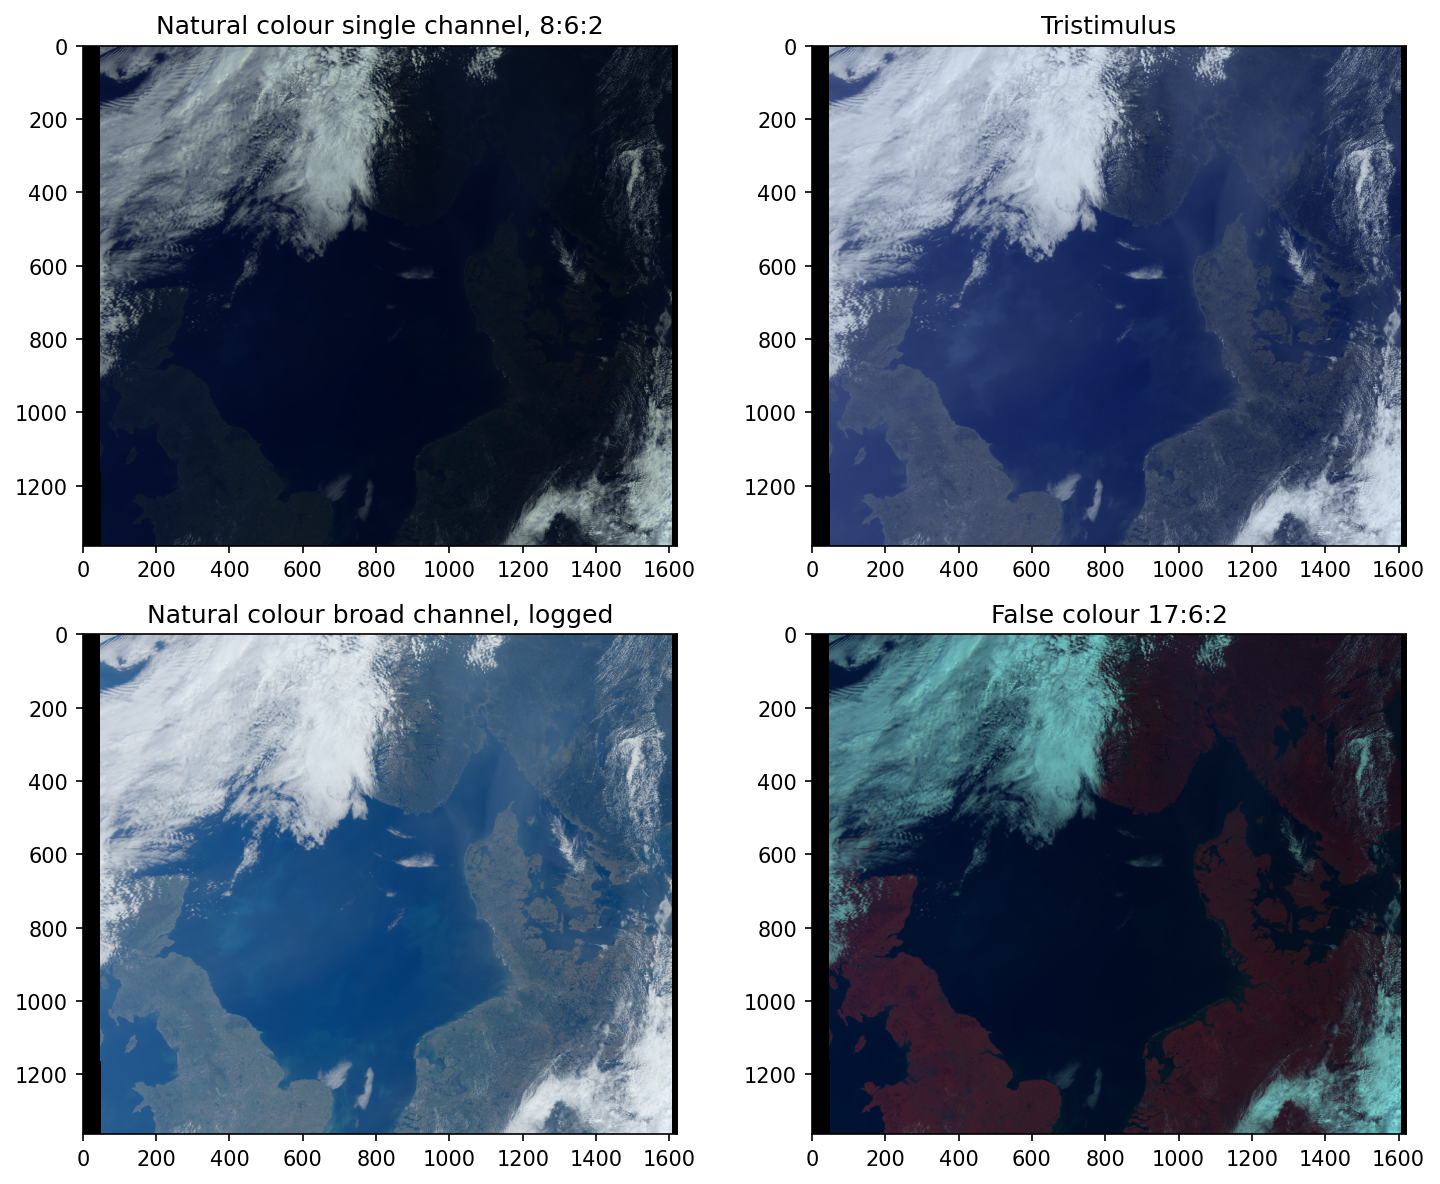

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

axs[0,0].imshow(rgb_nat_norm); axs[0,0].title.set_text('Natural colour single channel, 8:6:2')
axs[0,1].imshow(rgb_tri_norm); axs[0,1].title.set_text('Tristimulus')
axs[1,0].imshow(rgb_log_norm); axs[1,0].title.set_text('Natural colour broad channel, logged')
axs[1,1].imshow(rgb_fls_norm); axs[1,1].title.set_text('False colour 17:6:2')

plt.tight_layout()

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Improving RGBs
[Back to top](#TOC_TOP)

</div>

There are a number of ways that we can improve our RGB images. For instance we can:
* `normalise` our image by channel ("unhitch"-ing them), as opposed to above where we normalised by all channels.
* `histogram` our image, rebinning it in "n" bins to reduce the dynamic range, normalisation required first!
* `truncate` our image, cutting out some of the outliers based on percentiles

Lets try some of these examples below, using `rgb_log` (or `rgb_log_norm`) or as the basis.

In [10]:
rgb_log_norm_unhitch = eumartools.normalise_image(rgb_log, unhitch=True)
rgb_log_norm_trunc = eumartools.truncate_image(rgb_log_norm, min_percentile=5.0, max_percentile=95.0)
rgb_log_norm_hist = eumartools.histogram_image(rgb_log_norm, nbins=512)

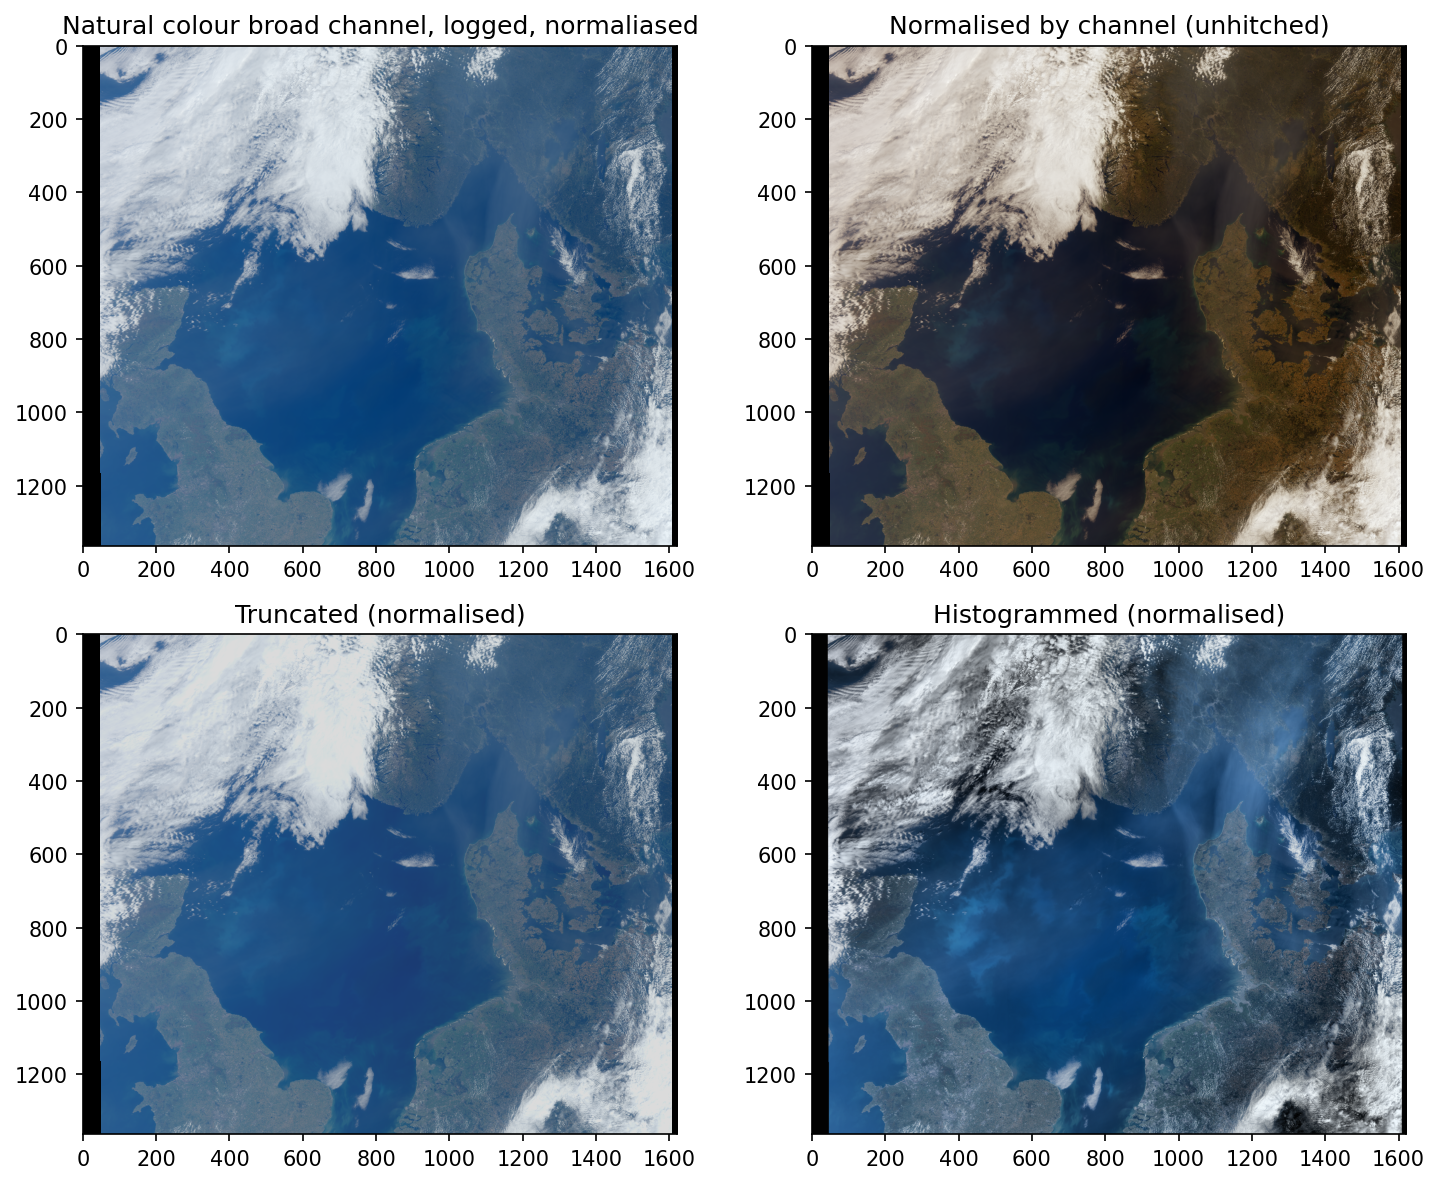

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

axs[0,0].imshow(rgb_log_norm); axs[0,0].title.set_text('Natural colour broad channel, logged, normaliased')
axs[0,1].imshow(rgb_log_norm_unhitch); axs[0,1].title.set_text('Normalised by channel (unhitched)')
axs[1,0].imshow(rgb_log_norm_trunc); axs[1,0].title.set_text('Truncated (normalised)')
axs[1,1].imshow(rgb_log_norm_hist); axs[1,1].title.set_text('Histogrammed (normalised)')

plt.tight_layout()

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Mapping RGBs
[Back to top](#TOC_TOP)

</div>

So far we have only shown images displayed against pixel coordinates (rows & columns). If we want to display this on geographical coordinates we need to use our longitude and latitude variables. The OLCI level-1b and level-2 grids are "curvilinear", so our longitude and latitude coordinates are both 2-dimensional arrays. The most convenient way to plot this in python is to use the matplotlib `pcolormesh` routine, and to map each pixel to an RGB colour.

In [12]:
geo_file = os.path.join(SAFE_directory,'geo_coordinates.nc')
geo_fid = xr.open_dataset(geo_file)
lon = geo_fid.longitude.data[::grid_reduce,::grid_reduce]
lat = geo_fid.latitude[::grid_reduce,::grid_reduce]
geo_fid.close()

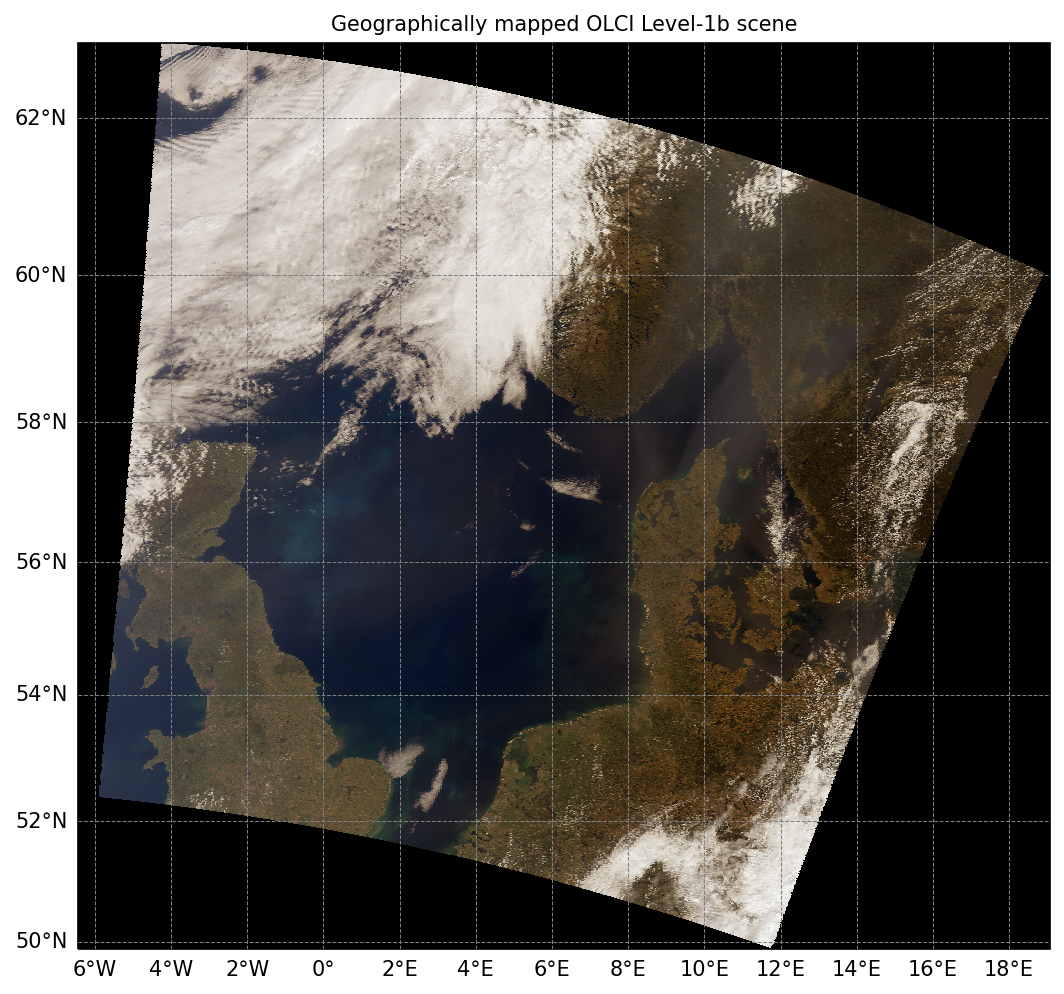

In [37]:
fig = plt.figure(figsize=(10, 8), dpi=150)
m = plt.subplot(projection=ccrs.Mercator())

# make the colour map
colorTuple = rgb_log_norm_unhitch.reshape((rgb_log_norm_unhitch.shape[0] * rgb_log_norm.shape[1]), 3)
colorTuple = np.insert(colorTuple, 3, 1.0, axis=1)

# make the map
m.pcolormesh(lon, lat, lon, color=colorTuple, edgecolors=None, transform=ccrs.PlateCarree())

# Embellish with gridlines
g1 = m.gridlines(draw_labels = True, zorder=20, color='0.5', linestyle='--',linewidth=0.5)
g1.xlocator = mticker.FixedLocator(np.arange(-180, 180, 2))
g1.ylocator = mticker.FixedLocator(np.arange(-90, 90, 2))
g1.xlabels_top = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 10, 'color': 'black'}
g1.ylabel_style = {'size': 10, 'color': 'black'}
m.set(facecolor = "k")

plt.title('Geographically mapped OLCI Level-1b scene', fontsize=10)
plt.show()

<div class="alert alert-danger" role="alert">

## <a id='section5'></a>5. Applying your knowledge
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-block alert-warning">

### Challenge:

Try using the routines provided to create a geographically mapped scene, that highlights the phytoplankton signals.
 <div>

In [ ]:
# Enter your solution here


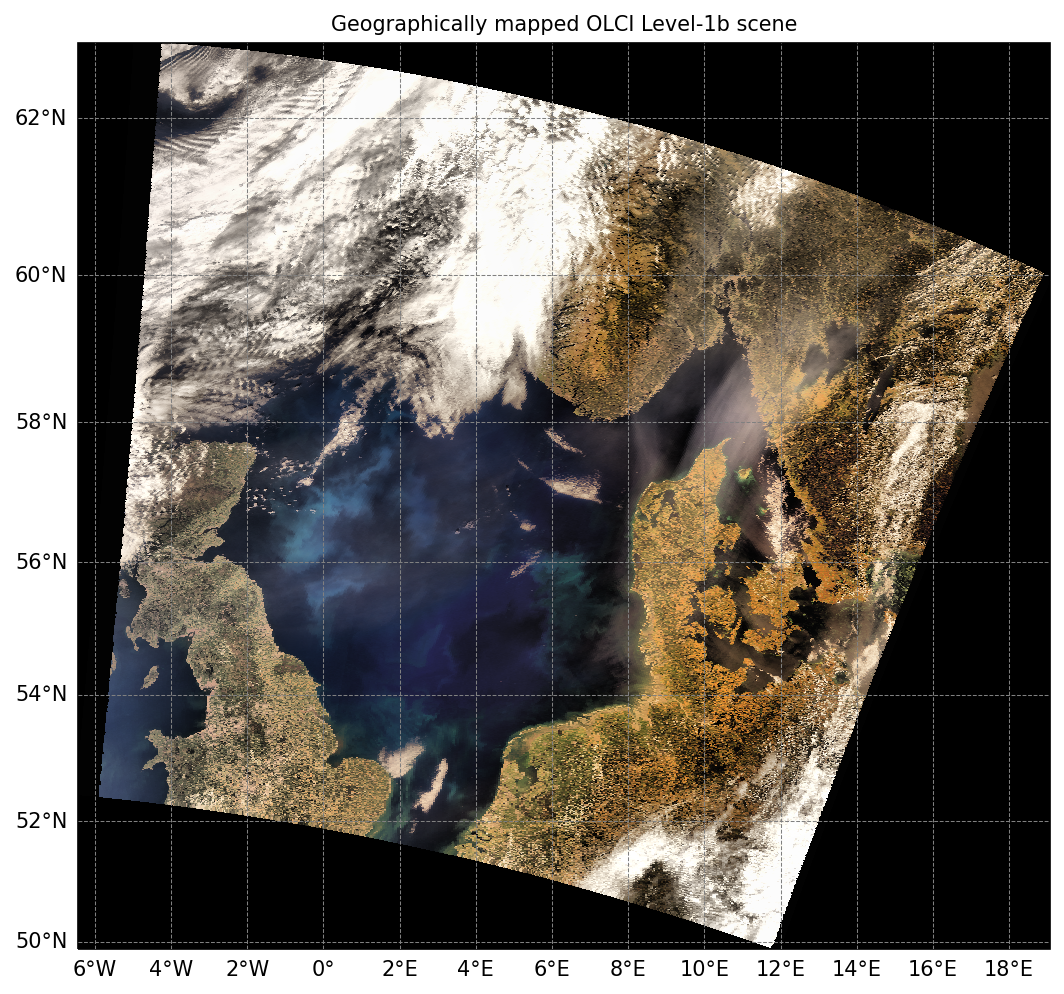

In [38]:
# first normalise by channel
rgb_log_norm_unhitch = eumartools.normalise_image(rgb_log, unhitch=True)
# then remove the outliers from the unhitched image
rgb_log_norm_unhitch_trunc = eumartools.truncate_image(rgb_log_norm_unhitch)
# then histogram the truncate image
rgb_log_final = eumartools.histogram_image(rgb_log_norm_unhitch_trunc, nbins=512)

# make the plot
fig = plt.figure(figsize=(10, 8), dpi=150)
m = plt.subplot(projection=ccrs.Mercator())

# make the colour map
colorTuple = rgb_log_final.reshape((rgb_log_final.shape[0] * rgb_log_final.shape[1]), 3)
colorTuple = np.insert(colorTuple, 3, 1.0, axis=1)

# make the map
m.pcolormesh(lon, lat, lon, color=colorTuple, edgecolors=None, transform=ccrs.PlateCarree())

# Embellish with gridlines
g1 = m.gridlines(draw_labels = True, zorder=20, color='0.5', linestyle='--',linewidth=0.5)
g1.xlocator = mticker.FixedLocator(np.arange(-180, 180, 2))
g1.ylocator = mticker.FixedLocator(np.arange(-90, 90, 2))
g1.xlabels_top = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 10, 'color': 'black'}
g1.ylabel_style = {'size': 10, 'color': 'black'}
m.set(facecolor = "k")

plt.title('Geographically mapped OLCI Level-1b scene', fontsize=10)
plt.show()

<hr>

### What to try next?

* Try choose your own OLCI Level-1 product and create your own RGB image.
* Try adapting this script to read an OLCI Level-2 and create your own RGB image <font color="#138D75">**(hint: "reflectance" replaces "radiance" at level-2)**</font>.
* Try using the `eumartools.subset_image` routine to only extract a smaller area

<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean/">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>